# Trabalho prático 1

## Exercício 1

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.colors as clr
import numpy as np

In [30]:
img1 = Image.open('./imagens/peppers.bmp')
img1 = img1.convert('RGB')

img1.save('./imagens/peppers_compressed_high.jpg', quality=75)

img1.save('./imagens/peppers_compressed_medium.jpg', quality=50)

img1.save('./imagens/peppers_compressed_low.jpg', quality=25)

| Original | High | Medium | Low |
|---|---|---|---|
| <img src='./imagens/peppers.bmp' width=200 heigh=100/>  | <img src='./imagens/peppers_compressed_high.jpg' width=200 heigh=100/>| <img src='./imagens/peppers_compressed_medium.jpg' width=200 heigh=100/> |<img src='./imagens/peppers_compressed_low.jpg' width=200 heigh=100/> |
| 100% | 75% | 50% | 25% | 
| 384 x 512 | 384 x 512 | 384 x 512 | 384 x 512 |
| 577KB | 24KB | 16KB | 11KB| 

## Exercício 2

In [31]:
def encoder(image):
    pass

In [32]:
def decoder(image):
    pass

## Exercício 3

In [33]:
## read image
def read_image(image_name):
    image = np.array(plt.imread(image_name))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image


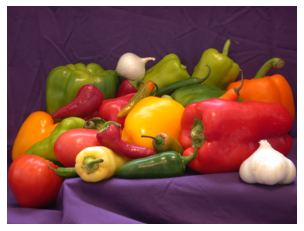

In [49]:
image = read_image('./imagens/peppers.bmp')

In [35]:
## create colormap
def create_colormap(color_list):
    return clr.LinearSegmentedColormap.from_list('cmap', color_list, N=256)


In [36]:
red_map = create_colormap(['black', 'red'])
green_map = create_colormap(['black', 'green'])
blue_map = create_colormap(['black', 'blue'])
random_map = create_colormap(['blue', 'orange', 'pink'])

In [37]:
def plot_image(image, colormap=['black', 'white']): # TODO: add title
    plt.figure() 
    plt.imshow(image, colormap)
    plt.axis('off')
    plt.show()

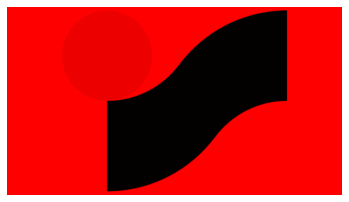

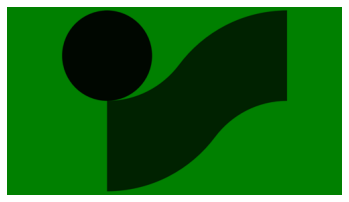

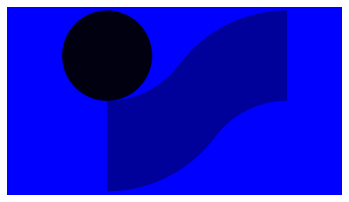

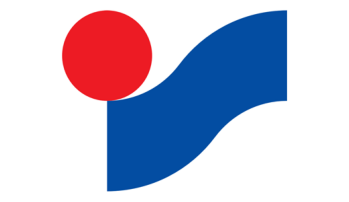

In [38]:
plot_image(image[:, :, 0], red_map)
plot_image(image[:, :, 1], green_map)
plot_image(image[:, :, 2], blue_map)
plot_image(image, random_map)

In [39]:
def get_image_rgb(image):
    return (image[:, :, 0], image[:, :, 1], image[:, :, 2])

In [40]:
def get_image_from_rgb(rgb):
    lines, columns = rgb[0].shape
    img = np.zeros((lines, columns, 3), dtype=np.uint8)
    img[:, :, 0] = rgb[0]
    img[:, :, 1] = rgb[1]
    img[:, :, 2] = rgb[2]
    return img

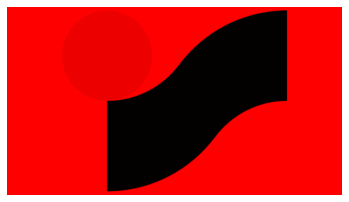

In [41]:
img_rgb = get_image_rgb(image)
plot_image(img_rgb[0], red_map)

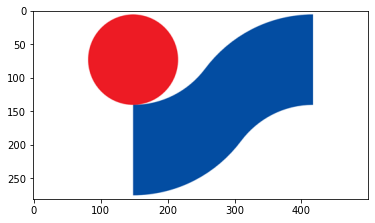

In [42]:
plt.imshow(get_image_from_rgb(img_rgb))

# Exercicio 4

Crie uma função para fazer padding da imagem. Caso a dimensão da imagem não seja múltipla de 16x16, faça padding da mesma, replicando a última linha e a última coluna em conformidade. Crie também a função inversa. Certifique-se de que recupera a imagem com a dimensão original, visualizando-a.

In [79]:
def add_padding(image):
    rows, columns, _ = image.shape
    
    
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    
    while rows % 16 != 0:
        red = np.vstack([red, red[-1, :]])
        green = np.vstack([green, green[-1, :]])
        blue = np.vstack([blue, blue[-1, :]])
        rows, columns, = red.shape
    
    while columns % 16 != 0:
        red = np.hstack([red, red[:, -1].reshape(-1, 1)])
        green = np.hstack([green, green[:, -1].reshape(-1, 1)])
        blue = np.hstack([blue, blue[:, -1].reshape(-1,-1)])
        rows, columns, = red.shape
    
    return get_image_from_rgb((red, green, blue))
    

(384, 512)
(384, 512, 3)


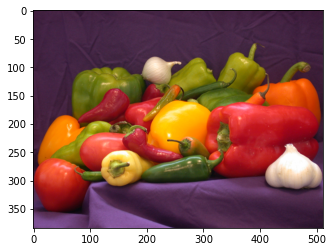

In [81]:
image = add_padding(image)

print(image.shape)

plt.imshow(image)
plt.show()